In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/covid/data/"
covid_dataset_url = base_url + "WHO-COVID-19-global-data.csv"

In [137]:
df = pd.read_csv(covid_dataset_url) #url yi oku ve DataFrame objesine ata
df.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
5,2020-02-09,AF,Afghanistan,EMRO,0,0,0,0
6,2020-02-16,AF,Afghanistan,EMRO,0,0,0,0
7,2020-02-23,AF,Afghanistan,EMRO,0,0,0,0
8,2020-03-01,AF,Afghanistan,EMRO,1,1,0,0
9,2020-03-08,AF,Afghanistan,EMRO,0,1,0,0


##### Eksik Verilerin Silinmesi ve Doldurulması

In [138]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code         1463
Country              1254
WHO_region           5016
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [139]:
# Country_code, Country ve WHO_region ortak eksik olan satırları sil
df.dropna(subset=['Country_code', 'Country', 'WHO_region'], how='all', inplace=True)

In [140]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code          209
Country                 0
WHO_region           3762
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [141]:
iso_dataset_url = base_url + "iso_code_and_region.csv"
iso_df = pd.read_csv(iso_dataset_url) #url yi oku ve DataFrame objesine ata
iso_df.head(10)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
7,Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


In [142]:
iso_df = iso_df.dropna(subset=['region', 'sub-region'], how='any')

In [143]:
iso_df.isnull().sum()

name                          0
alpha-2                       1
alpha-3                       0
country-code                  0
iso_3166-2                    0
region                        0
sub-region                    0
intermediate-region         141
region-code                   0
sub-region-code               0
intermediate-region-code    141
dtype: int64

In [144]:
# Iso_df'den Country'e göre Alpha-2 code'u bulan fonksiyon
def get_country_code(country):
    matching_row = iso_df[iso_df['name'].str.lower() == country.lower()]
    if not matching_row.empty:
        return matching_row['alpha-2']
    else:
        return None

In [145]:
# Country_code eksikse ve Country varsa, iso_df'den Alpha-2 code'u çek ve doldur
df['Country_code'] = df.apply(
    lambda row: get_country_code(row['Country']) if pd.isnull(row['Country_code']) else row['Country_code'],
    axis=1
)

In [146]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code            0
Country                 0
WHO_region           3762
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [131]:
# Tarih sütununu ay, yıl ve gün olarak ayırma
'''df['Year'] = df['Date_reported'].dt.year
df['Month'] = df['Date_reported'].dt.month
df['Day'] = df['Date_reported'].dt.day'''

"df['Year'] = df['Date_reported'].dt.year\ndf['Month'] = df['Date_reported'].dt.month\ndf['Day'] = df['Date_reported'].dt.day"

In [101]:
#df.drop(['Date_reported'], axis=1, inplace=True)

In [147]:
df = df.dropna(subset=['WHO_region'], how='any')

In [148]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [149]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
50155,2023-12-03,ZW,Zimbabwe,AFRO,0,265975,0,5730
50156,2023-12-10,ZW,Zimbabwe,AFRO,0,265975,0,5730
50157,2023-12-17,ZW,Zimbabwe,AFRO,50,266025,0,5730
50158,2023-12-24,ZW,Zimbabwe,AFRO,23,266048,1,5731


In [159]:
print(df.dtypes)

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object


# Type 1

##### Burada df_pivot'a New_cases adı verip burada olduğu gibi (Cumulative_cases, New_deaths ve Cumulative_deaths) şeklinde 4 farklı dataframe oluşturup işlemlere sokabilirm.

In [164]:
# Date_reported kolonunu datetime tipine dönüştürme ve sıralama
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df = df.sort_values(by='Date_reported')

In [171]:
# 'Date_reported' sütunundaki her bir tarihi sütunlara dönüştürme
df_pivot = df.pivot_table(index=['Country', 'WHO_region'], columns='Date_reported',
                         values=['New_cases'])

# aggfunc parametresi, aynı indekse ve sütuna sahip girişlerin nasıl birleştirileceğini belirtir. 
# Burada 'sum' kullanılıyor, yani aynı indekse ve sütuna sahip girişlerin toplamı alıyor.

# Sütun isimlerini düzenleme
df_pivot.columns = [f'{col[1].strftime("%Y-%m-%d")}' for col in df_pivot.columns]

df_pivot.reset_index(inplace=True) # index sıfırlama

df_pivot.head(10) 

,Country,WHO_region,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,...,2023-10-29,2023-11-05,2023-11-12,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31
0,Afghanistan,EMRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,383.0,353.0,371.0,432.0,280.0,288.0,106.0,317.0,304.0,300.0
1,Albania,EURO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,106.0,74.0,61.0,77.0,42.0,56.0,49.0,0.0,0.0
2,Algeria,AFRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,20.0,6.0,12.0,13.0,19.0,0.0,0.0,0.0,0.0
3,American Samoa,WPRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,EURO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Angola,AFRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,9.0,15.0,122.0,92.0,87.0,45.0,372.0,0.0
6,Anguilla,AMRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Antigua and Barbuda,AMRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Argentina,AMRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,655.0,444.0,447.0,485.0,492.0,593.0,427.0,558.0,304.0,0.0
9,Armenia,EURO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,162.0,141.0,119.0,115.0,97.0,68.0,81.0,0.0,0.0,0.0


# Type 2

In [71]:
# Date_reported kolonunu datetime tipine dönüştürme ve sıralama
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df = df.sort_values(by='Date_reported')

##### Pivot Table için yararlanılan kaynak: https://stackoverflow.com/questions/70568025/restructuring-a-pandas-dataframe-convert-dates-in-rows-to-columns

In [72]:
# 'Date_reported' sütunundaki her bir tarihi sütunlara dönüştürme
df_pivot = df.pivot_table(index=['Country', 'WHO_region'], columns='Date_reported',
                         values=['New_cases', 'New_deaths'], aggfunc='sum')

# aggfunc parametresi, aynı indekse ve sütuna sahip girişlerin nasıl birleştirileceğini belirtir. 
# Burada 'sum' kullanılıyor, yani aynı indekse ve sütuna sahip girişlerin toplamı alıyor.

# Sütun isimlerini düzenleme
df_pivot.columns = [f'{col[0]}_{col[1].strftime("%Y-%m-%d")}' for col in df_pivot.columns]

df_pivot.head(10)

,,New_cases_2020-01-05,New_cases_2020-01-12,New_cases_2020-01-19,New_cases_2020-01-26,New_cases_2020-02-02,New_cases_2020-02-09,New_cases_2020-02-16,New_cases_2020-02-23,New_cases_2020-03-01,New_cases_2020-03-08,...,New_deaths_2023-10-29,New_deaths_2023-11-05,New_deaths_2023-11-12,New_deaths_2023-11-19,New_deaths_2023-11-26,New_deaths_2023-12-03,New_deaths_2023-12-10,New_deaths_2023-12-17,New_deaths_2023-12-24,New_deaths_2023-12-31
Country,WHO_region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,EMRO,0,0,0,0,0,0,0,0,1,0,...,1,3,4,1,2,2,0,1,4,3
Albania,EURO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,AFRO,0,0,0,0,0,0,0,0,1,18,...,0,0,0,0,0,0,0,0,0,0
American Samoa,WPRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,EURO,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Angola,AFRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Anguilla,AMRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,AMRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,AMRO,0,0,0,0,0,0,0,0,0,22,...,4,4,7,7,3,1,2,2,1,0


In [92]:
#df_pivot.isnull().sum()

New_cases_2020-01-05     0
New_cases_2020-01-12     0
New_cases_2020-01-19     0
New_cases_2020-01-26     0
New_cases_2020-02-02     0
                        ..
New_deaths_2023-12-03    0
New_deaths_2023-12-10    0
New_deaths_2023-12-17    0
New_deaths_2023-12-24    0
New_deaths_2023-12-31    0
Length: 418, dtype: int64

In [73]:
# DataFrame'deki eksik veri sayısını her sütun için göster
missing_values = df_pivot.isnull().sum()

# Eğer bir sütundaki eksik veri sayısı 0 değilse, o sütunu göster
columns_with_missing_values = missing_values[missing_values != 0]

# Eksik veri sayısı olan sütunları ve bu sütunlardaki eksik veri sayısını yazdır
print("Eksik Veriler:")
print(columns_with_missing_values)

Eksik Veriler:
Series([], dtype: int64)


In [74]:
df_pivot.columns

Index(['New_cases_2020-01-05', 'New_cases_2020-01-12', 'New_cases_2020-01-19',
       'New_cases_2020-01-26', 'New_cases_2020-02-02', 'New_cases_2020-02-09',
       'New_cases_2020-02-16', 'New_cases_2020-02-23', 'New_cases_2020-03-01',
       'New_cases_2020-03-08',
       ...
       'New_deaths_2023-10-29', 'New_deaths_2023-11-05',
       'New_deaths_2023-11-12', 'New_deaths_2023-11-19',
       'New_deaths_2023-11-26', 'New_deaths_2023-12-03',
       'New_deaths_2023-12-10', 'New_deaths_2023-12-17',
       'New_deaths_2023-12-24', 'New_deaths_2023-12-31'],
      dtype='object', length=418)

In [75]:
# New_cases ile başlayan sütunları seç
filtered_columns = df_pivot.filter(regex='^New_cases')

# Sütunları topla ve ülkeler bazında toplam vaka sayısını al
country_cases = filtered_columns.groupby("Country").sum()

# Toplam vaka sayısına göre büyükten küçüğe sırala ve ilk 50'yi al
country_cases = country_cases.sum(axis=1).sort_values(ascending=False).head(50)


In [76]:
country_cases

Country
United States of America                                103436829
China                                                    99322525
India                                                    45010891
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26517706
United Kingdom of Great Britain and Northern Ireland     24843591
Russian Federation                                       23608723
Türkiye                                                  17004677
Spain                                                    13980340
Australia                                                11710216
Viet Nam                                                 11624000
Ar

- plt.gca(): Geçerli eksenin (Current Axes) özelliklerini alır. gca, "get current axes" kısaltmasıdır.

- yaxis: Y eksenine (vertical axis) erişim sağlar.

- set_major_formatter(): Ana bölme etiketlerinin biçimini belirler. Yani, y eksenindeki büyük bölme etiketlerini düzenler.

- plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'): Bu kısımda bir sayı biçimleyici (formatter) atanıyor. {x:,.0f} formatı, sayıları virgül ile binlik gruplara ayırarak, ondalık kısmı olmayacak şekilde düzenler. Bu, sayıları daha okunabilir hale getirir.

İlgili satır, y eksenindeki sayıları biçimlendirerek, örneğin "1,000" yerine "1K" gibi bir formatta göstermeye yardımcı olur.

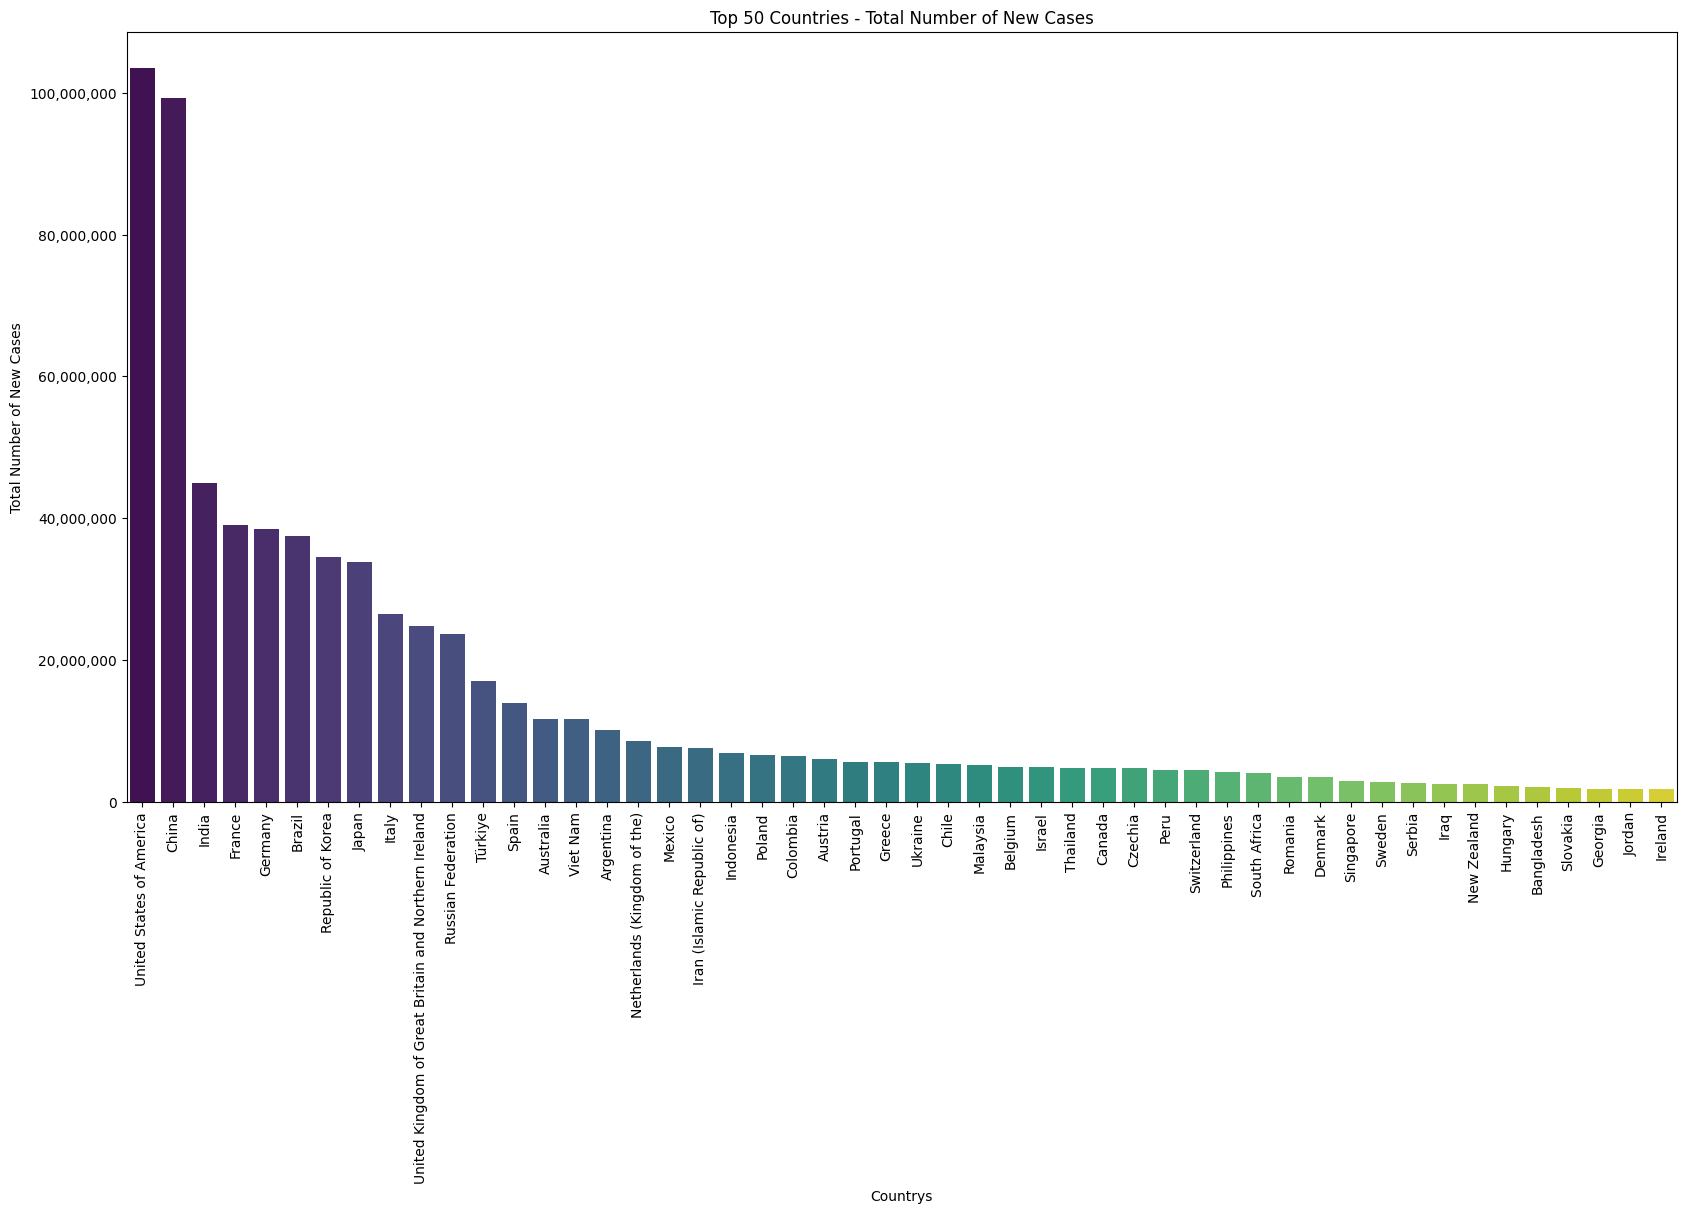

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x=country_cases.index,y=country_cases.values, hue=country_cases.index, palette="viridis")

plt.title('Top 50 Countries - Total Number of New Cases')  
plt.xlabel('Countrys')  
plt.ylabel('Total Number of New Cases')
plt.xticks(rotation=90)  
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()  

In [70]:
# New_deaths ile başlayan sütunları seç
filtered_columns = df_pivot.filter(regex='^New_deaths')

# Sütunları topla ve ülkeler bazında toplam vaka sayısını al
country_deaths = filtered_columns.groupby("Country").sum()

# Toplam vaka sayısına göre büyükten küçüğe sırala ve ilk 50'yi al
country_deaths = country_deaths.sum(axis=1).sort_values(ascending=False).head(50)

In [71]:
country_deaths

Country
United States of America                                1144877
Brazil                                                   702116
India                                                    533346
Russian Federation                                       400967
Mexico                                                   334958
United Kingdom of Great Britain and Northern Ireland     232112
Peru                                                     221583
Italy                                                    193886
Germany                                                  174979
France                                                   167985
Indonesia                                                161965
Iran (Islamic Republic of)                               146757
Colombia                                                 142727
Argentina                                                130687
China                                                    121889
Spain                           

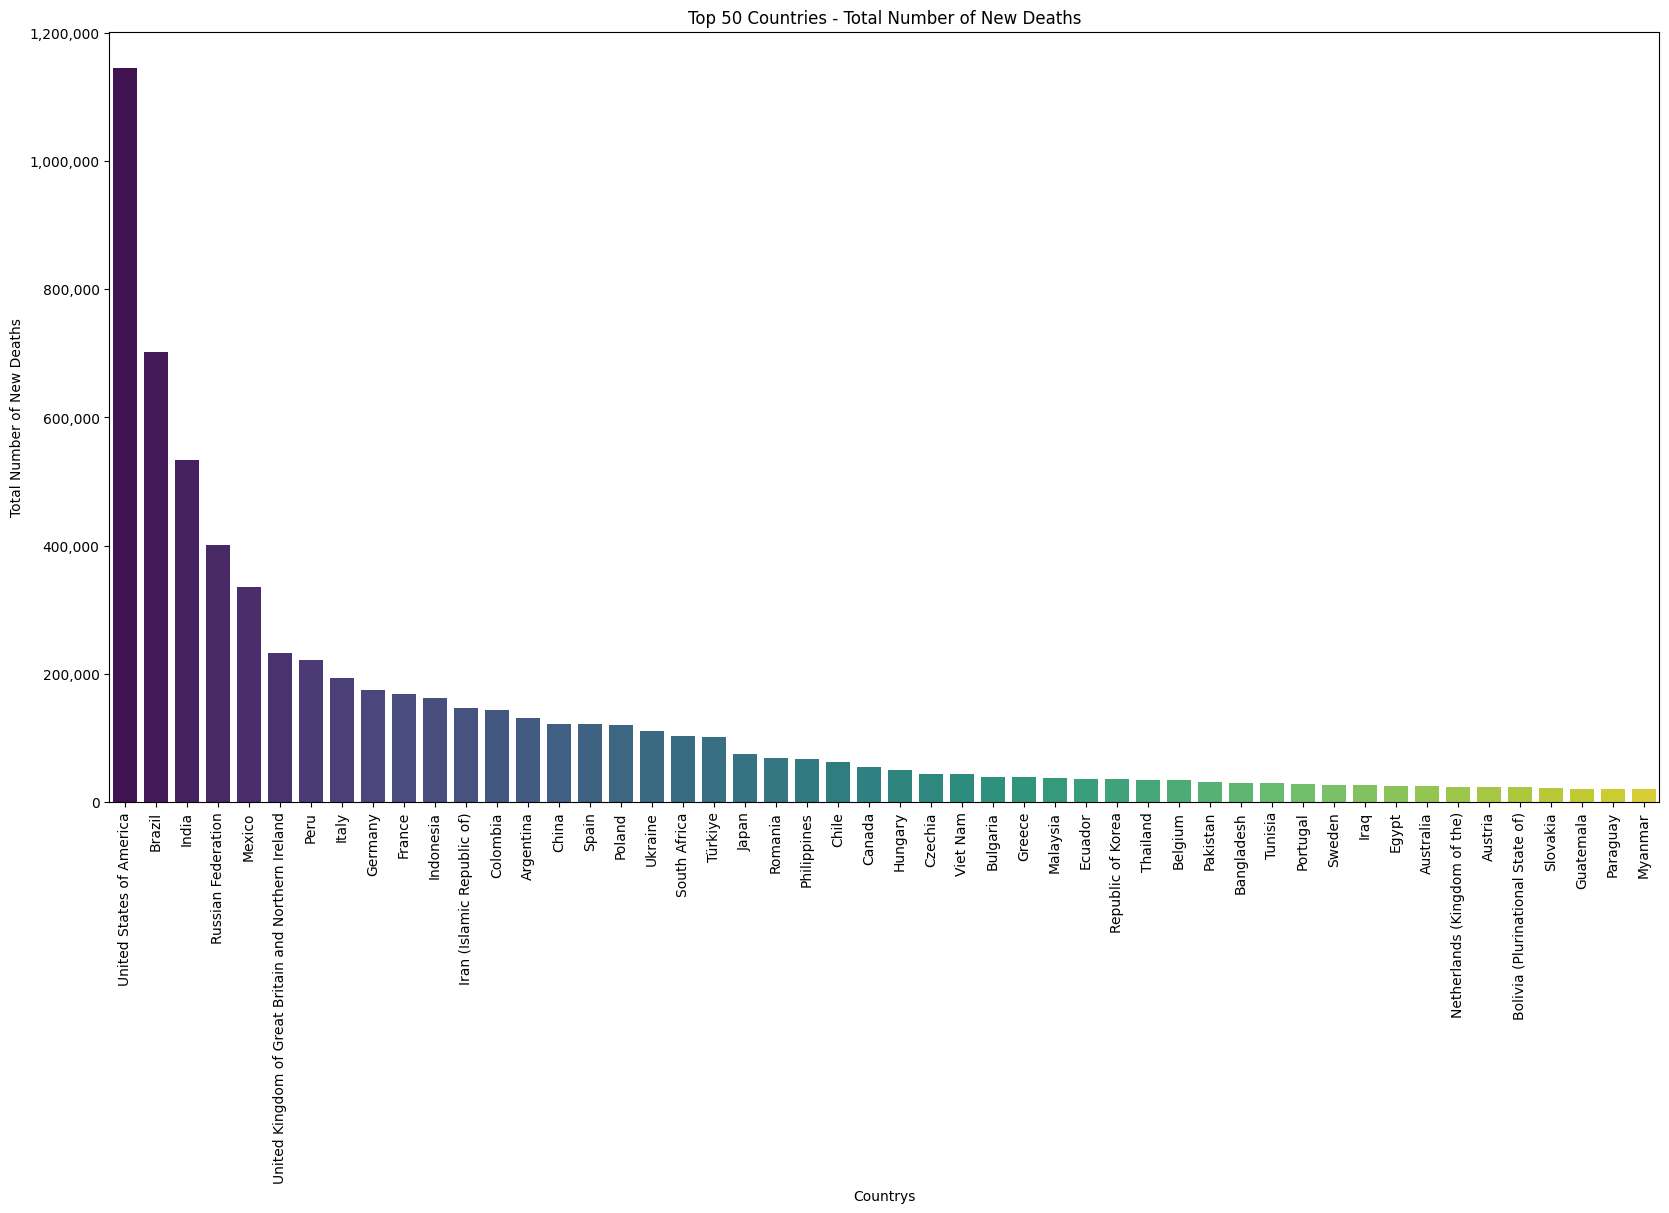

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x=country_deaths.index,y=country_deaths.values,hue=country_deaths.index, palette="viridis")
plt.title('Top 50 Countries - Total Number of New Deaths')  
plt.xlabel('Countrys')  
plt.ylabel('Total Number of New Deaths')  
plt.xticks(rotation=90)  
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) #Prints the values in the graph as integers
plt.show()

In [77]:
# "New_cases" ile başlayan sütunları seç
filtered_columns = df_pivot.filter(regex='^New_cases')

# WHO bölgesine göre sütunları topla
region_cases = filtered_columns.groupby(df_pivot.index.get_level_values('WHO_region')).sum().sum(axis=1).sort_values(ascending=False)

In [78]:
region_cases

WHO_region
EURO     277891434
WPRO     207932068
AMRO     192645503
SEARO     61230262
EMRO      23409037
AFRO       9030112
dtype: int64

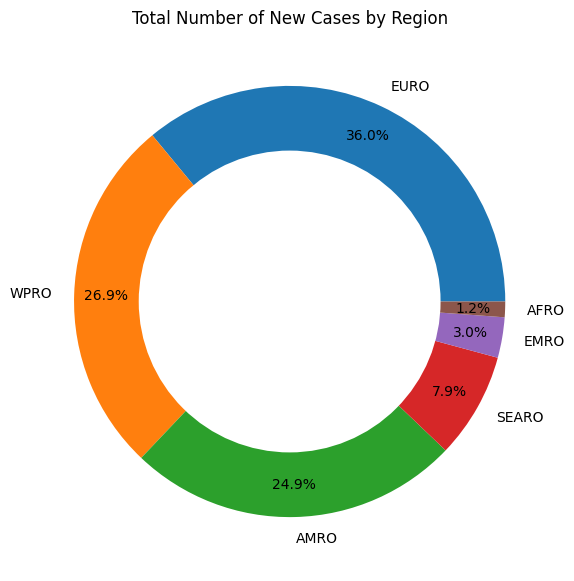

In [79]:
plt.figure(figsize=(15, 7))
plt.pie(region_cases.values, labels=region_cases.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Drawing a white circle in the center, making it hollow
plt.title('Total Number of New Cases by Region')
plt.show()

In [83]:
# "New_cases" ile başlayan sütunları seç
filtered_columns = df_pivot.filter(regex='^New_deaths')

# WHO bölgesine göre sütunları topla
region_deaths = filtered_columns.groupby(df_pivot.index.get_level_values('WHO_region')).sum().sum(axis=1).sort_values(ascending=False)

In [84]:
region_deaths

WHO_region
AMRO     2973149
EURO     2260979
SEARO     808190
WPRO      419006
EMRO      351865
AFRO      174369
dtype: int64

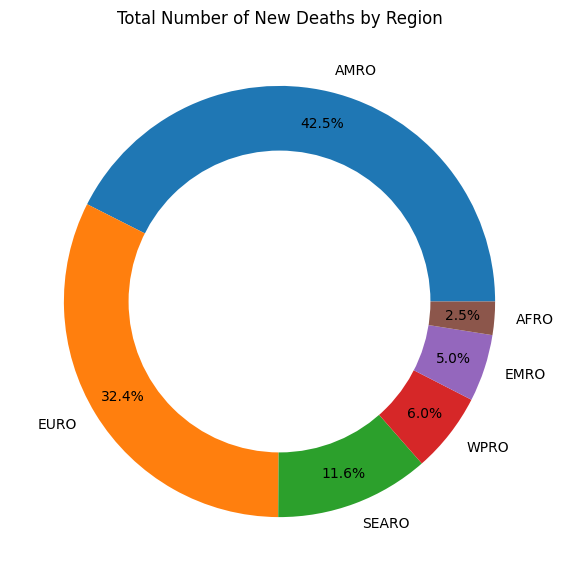

In [85]:
plt.figure(figsize=(15, 7))
plt.pie(region_deaths.values, labels=region_deaths.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Drawing a white circle in the center, making it hollow
plt.title('Total Number of New Deaths by Region')
plt.show()

In [123]:
# Türkiye'ye ait veriyi seç
turkey_data = df_pivot[df_pivot.index.get_level_values('Country') == 'Türkiye']
turkey_data

,,New_cases_2020-01-05,New_cases_2020-01-12,New_cases_2020-01-19,New_cases_2020-01-26,New_cases_2020-02-02,New_cases_2020-02-09,New_cases_2020-02-16,New_cases_2020-02-23,New_cases_2020-03-01,New_cases_2020-03-08,...,New_deaths_2023-10-29,New_deaths_2023-11-05,New_deaths_2023-11-12,New_deaths_2023-11-19,New_deaths_2023-11-26,New_deaths_2023-12-03,New_deaths_2023-12-10,New_deaths_2023-12-17,New_deaths_2023-12-24,New_deaths_2023-12-31
Country,WHO_region,,,,,,,,,,,,,,,,,,,,,
Türkiye,EURO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Eğitim ve test verisini ayırın (2022 ve öncesi eğitim, 2023 test)
train_data = turkey_data[turkey_data.columns[turkey_data.columns.str.startswith('New_cases_2020') | turkey_data.columns.str.startswith('New_cases_2021') | turkey_data.columns.str.startswith('New_cases_2022')]]
test_data = turkey_data[turkey_data.columns[turkey_data.columns.str.startswith('New_cases_2023')]]

In [125]:
train_data

,,New_cases_2020-01-05,New_cases_2020-01-12,New_cases_2020-01-19,New_cases_2020-01-26,New_cases_2020-02-02,New_cases_2020-02-09,New_cases_2020-02-16,New_cases_2020-02-23,New_cases_2020-03-01,New_cases_2020-03-08,...,New_cases_2022-10-23,New_cases_2022-10-30,New_cases_2022-11-06,New_cases_2022-11-13,New_cases_2022-11-20,New_cases_2022-11-27,New_cases_2022-12-04,New_cases_2022-12-11,New_cases_2022-12-18,New_cases_2022-12-25
Country,WHO_region,,,,,,,,,,,,,,,,,,,,,
Türkiye,EURO,0,0,0,0,0,0,0,0,0,0,...,11808,11083,13508,15299,0,0,0,0,0,0


In [126]:
test_data

,,New_cases_2023-01-01,New_cases_2023-01-08,New_cases_2023-01-15,New_cases_2023-01-22,New_cases_2023-01-29,New_cases_2023-02-05,New_cases_2023-02-12,New_cases_2023-02-19,New_cases_2023-02-26,New_cases_2023-03-05,...,New_cases_2023-10-29,New_cases_2023-11-05,New_cases_2023-11-12,New_cases_2023-11-19,New_cases_2023-11-26,New_cases_2023-12-03,New_cases_2023-12-10,New_cases_2023-12-17,New_cases_2023-12-24,New_cases_2023-12-31
Country,WHO_region,,,,,,,,,,,,,,,,,,,,,
Türkiye,EURO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Eğitim verisini ayırın
X_train = train_data.drop(columns=train_data.filter(regex='^New_cases_2023').columns)
y_train = train_data.filter(regex='^New_cases_2023')

# Lineer Regresyon modelini oluşturun
model = LinearRegression()

# Modeli eğitin
model.fit(X_train, y_train)

# Test verisini ayırın
X_test = test_data.drop(columns=test_data.filter(regex='^New_cases_2023').columns)
y_test = test_data.filter(regex='^New_cases_2023')

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Modelin doğrusunu ve veriyi görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(y_test.values.flatten(), label='Gerçek Değerler', marker='o')
plt.plot(y_pred.flatten(), label='Tahminler', marker='o')
plt.title('2023 Yılı Yeni Vakalar Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Yeni Vakalar')
plt.legend()
plt.show()


ValueError: at least one array or dtype is required

# -----------------Burası yok...-----------------------

##### Verilerin Görselleştirilerek İncelenmesi

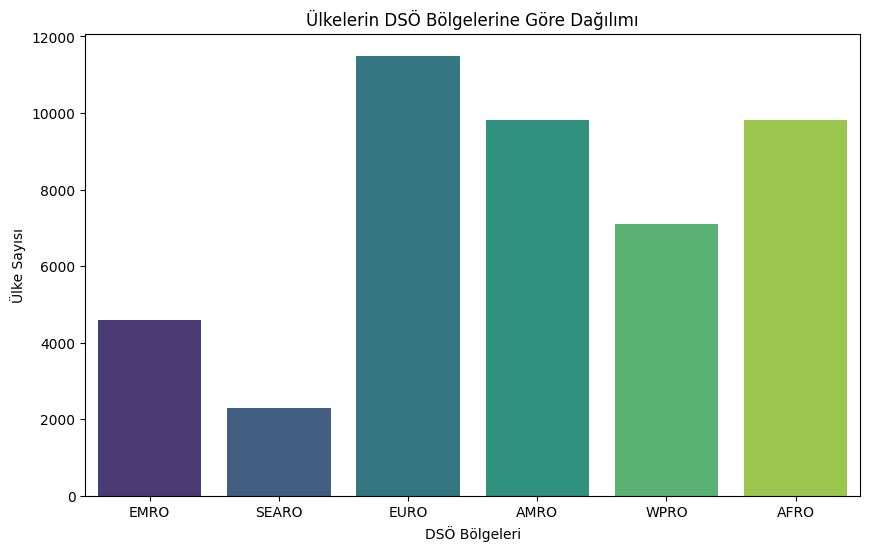

In [86]:
# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
sns.countplot(x='WHO_region', data=df, palette='viridis', hue='WHO_region')
plt.title('Ülkelerin DSÖ Bölgelerine Göre Dağılımı')
plt.xlabel('DSÖ Bölgeleri')
plt.ylabel('Ülke Sayısı')
plt.show()

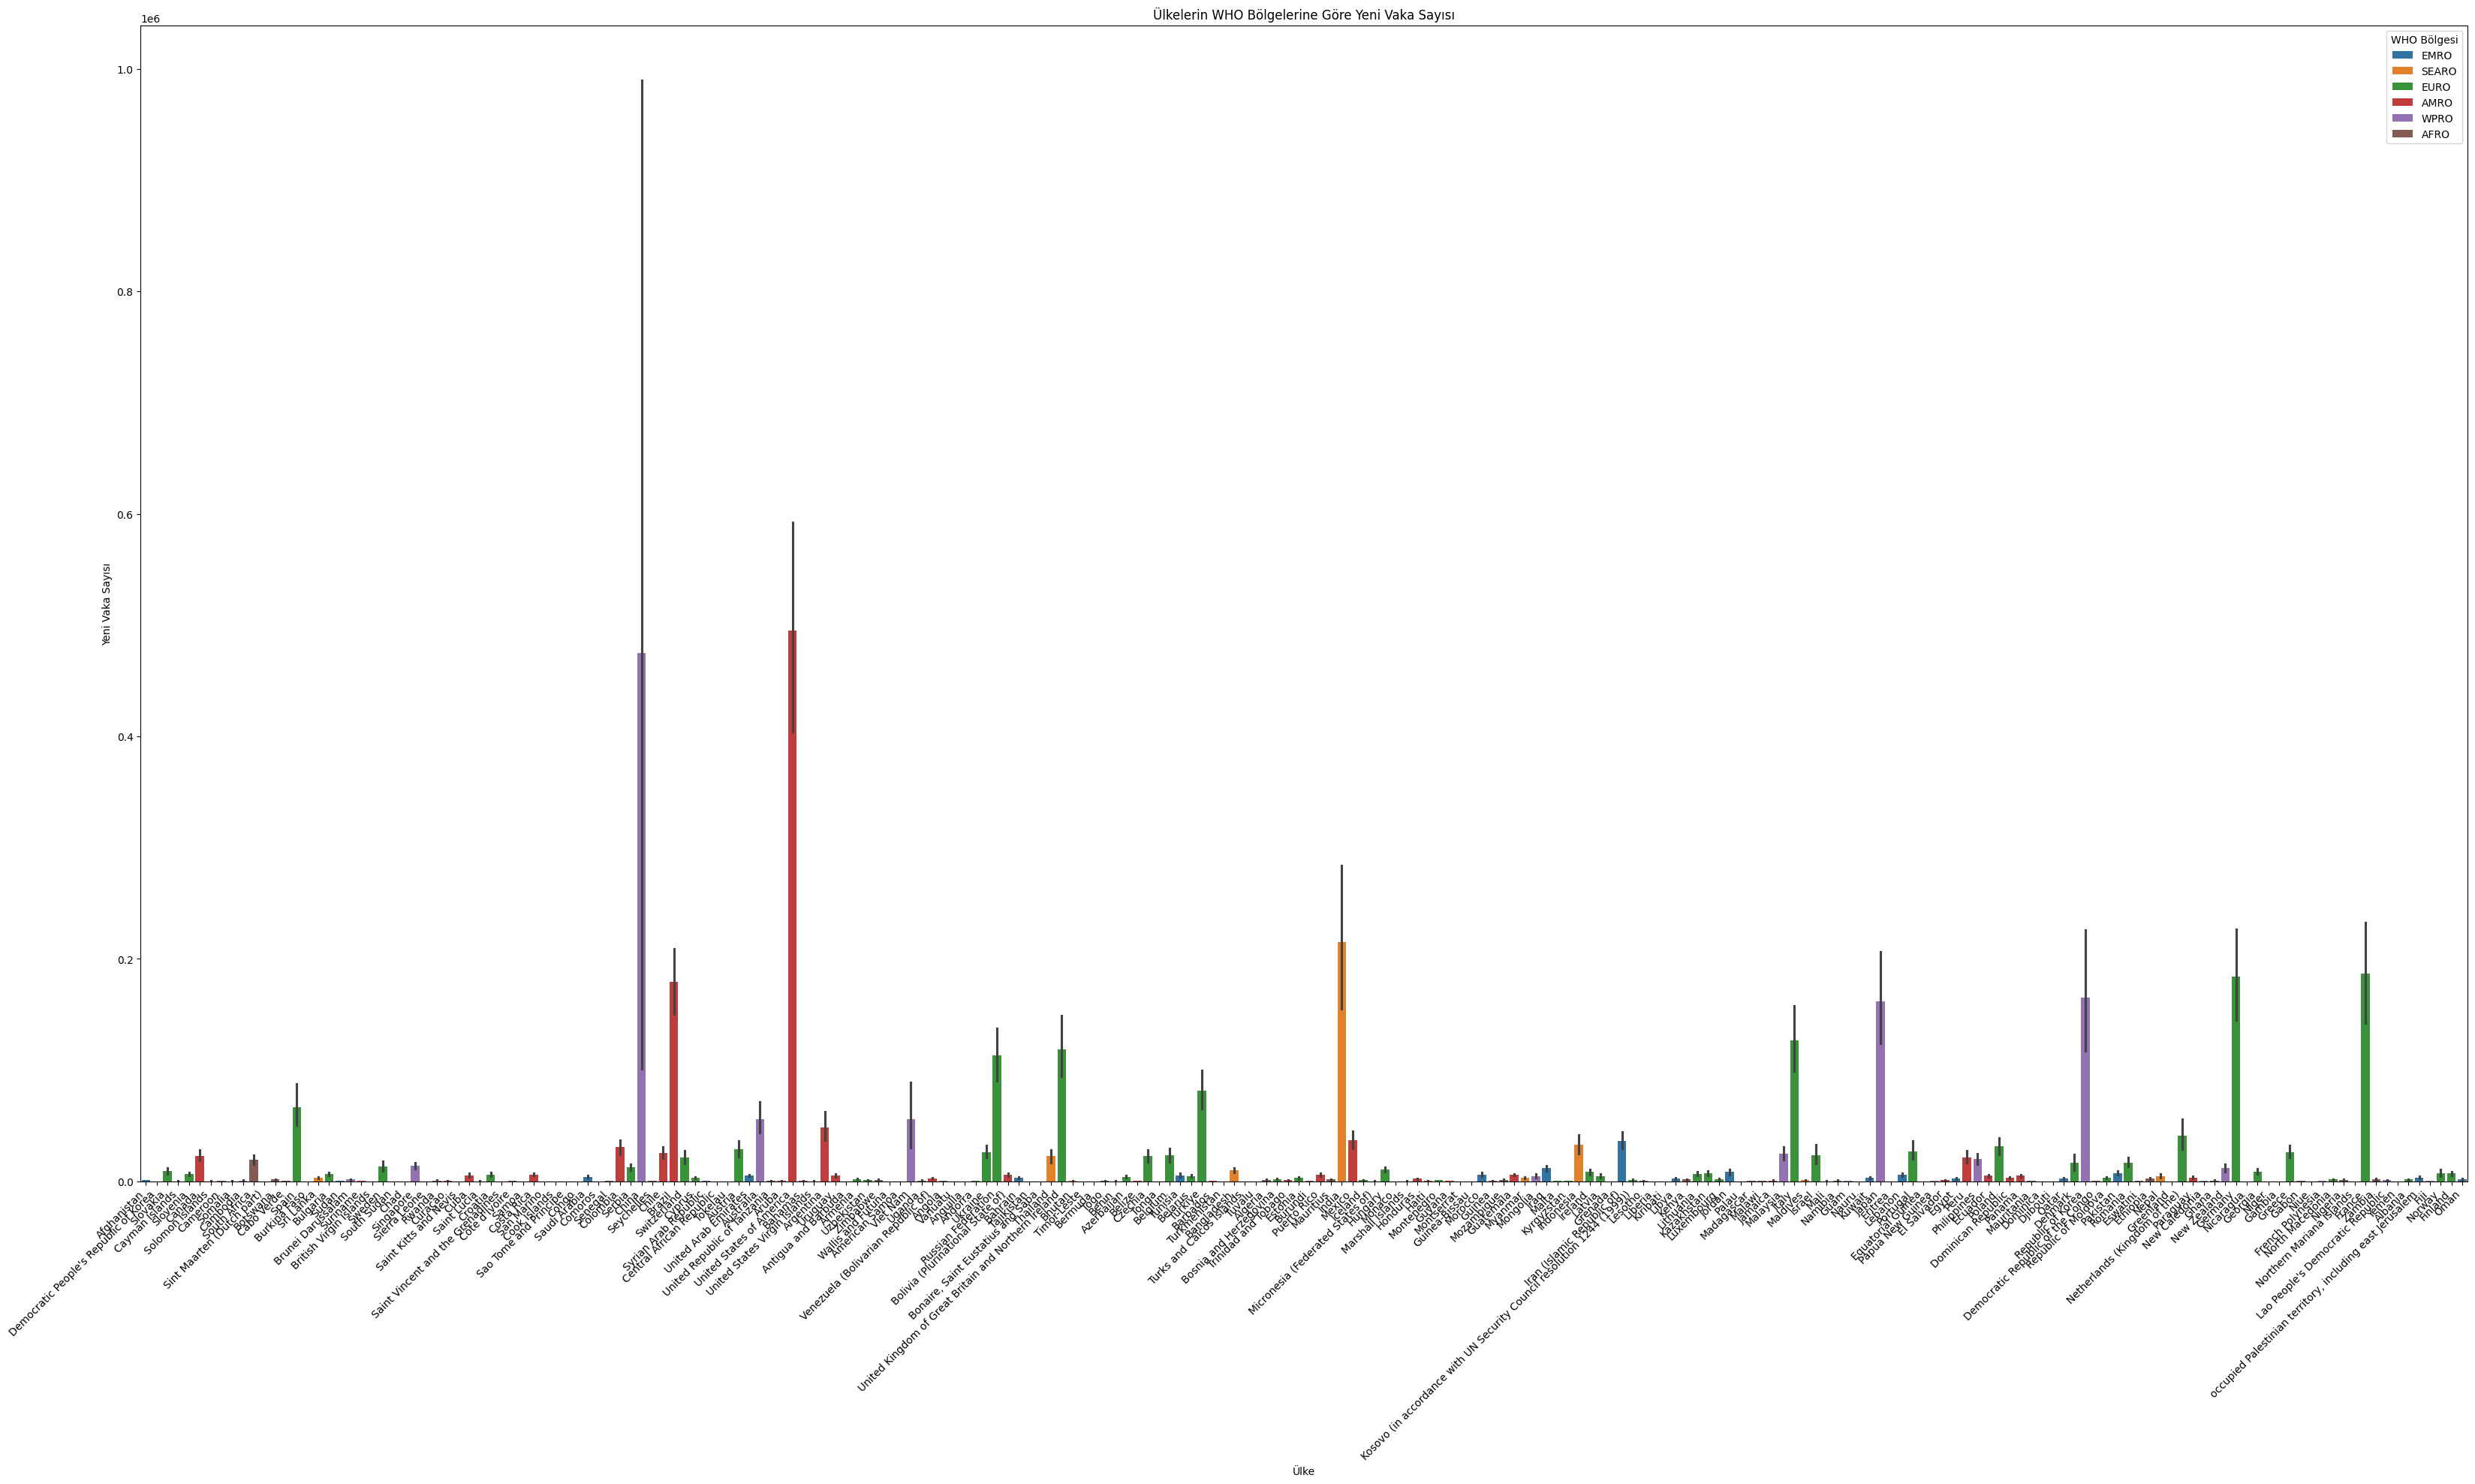

In [87]:
# Çubuk grafik kullanarak her ülkenin WHO bölgesine göre New_cases değerini göster
plt.figure(figsize=(40, 20))
sns.barplot(x='Country', y='New_cases', hue='WHO_region', data=df)

# x eksenindeki ülke etiketlerini 45 derece sola yatık yap
plt.xticks(rotation=45, ha='right')

plt.title('Ülkelerin WHO Bölgelerine Göre Yeni Vaka Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Yeni Vaka Sayısı')
plt.legend(title='WHO Bölgesi', loc='upper right')
plt.show()

In [409]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

Text(0.5, 1.0, 'Günlük Yeni Vakalar')

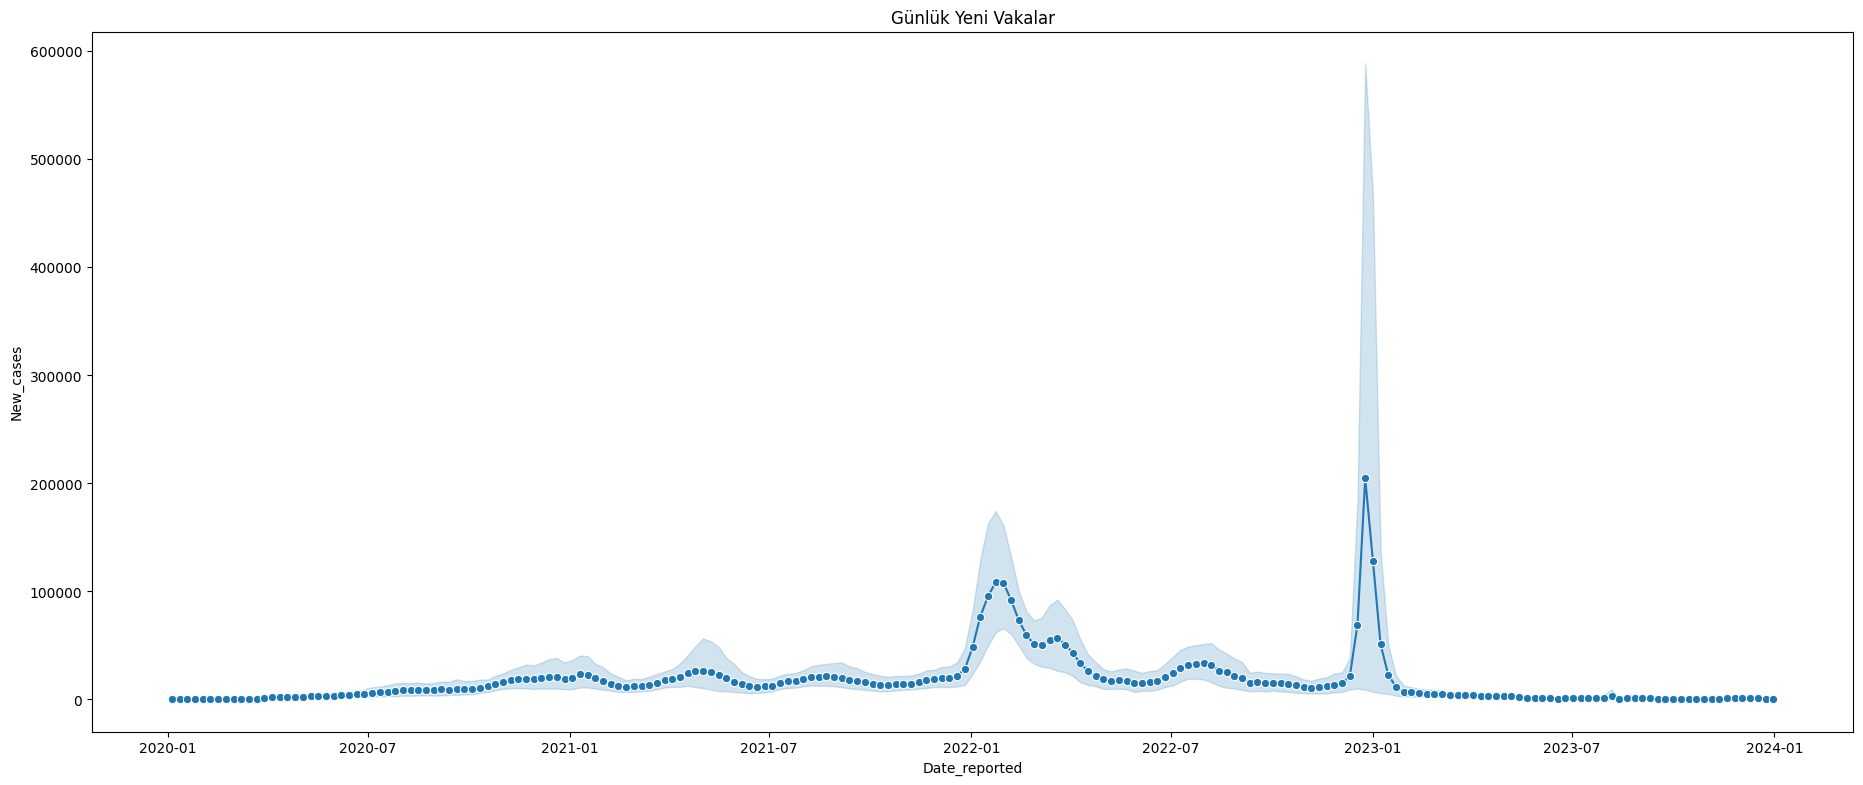

In [410]:
# Günlük yeni vakaların grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 1)
sns.lineplot(x='Date_reported', y='New_cases', data=df, marker='o')
plt.title('Günlük Yeni Vakalar')

Text(0.5, 1.0, 'Kumulatif Vakalar')

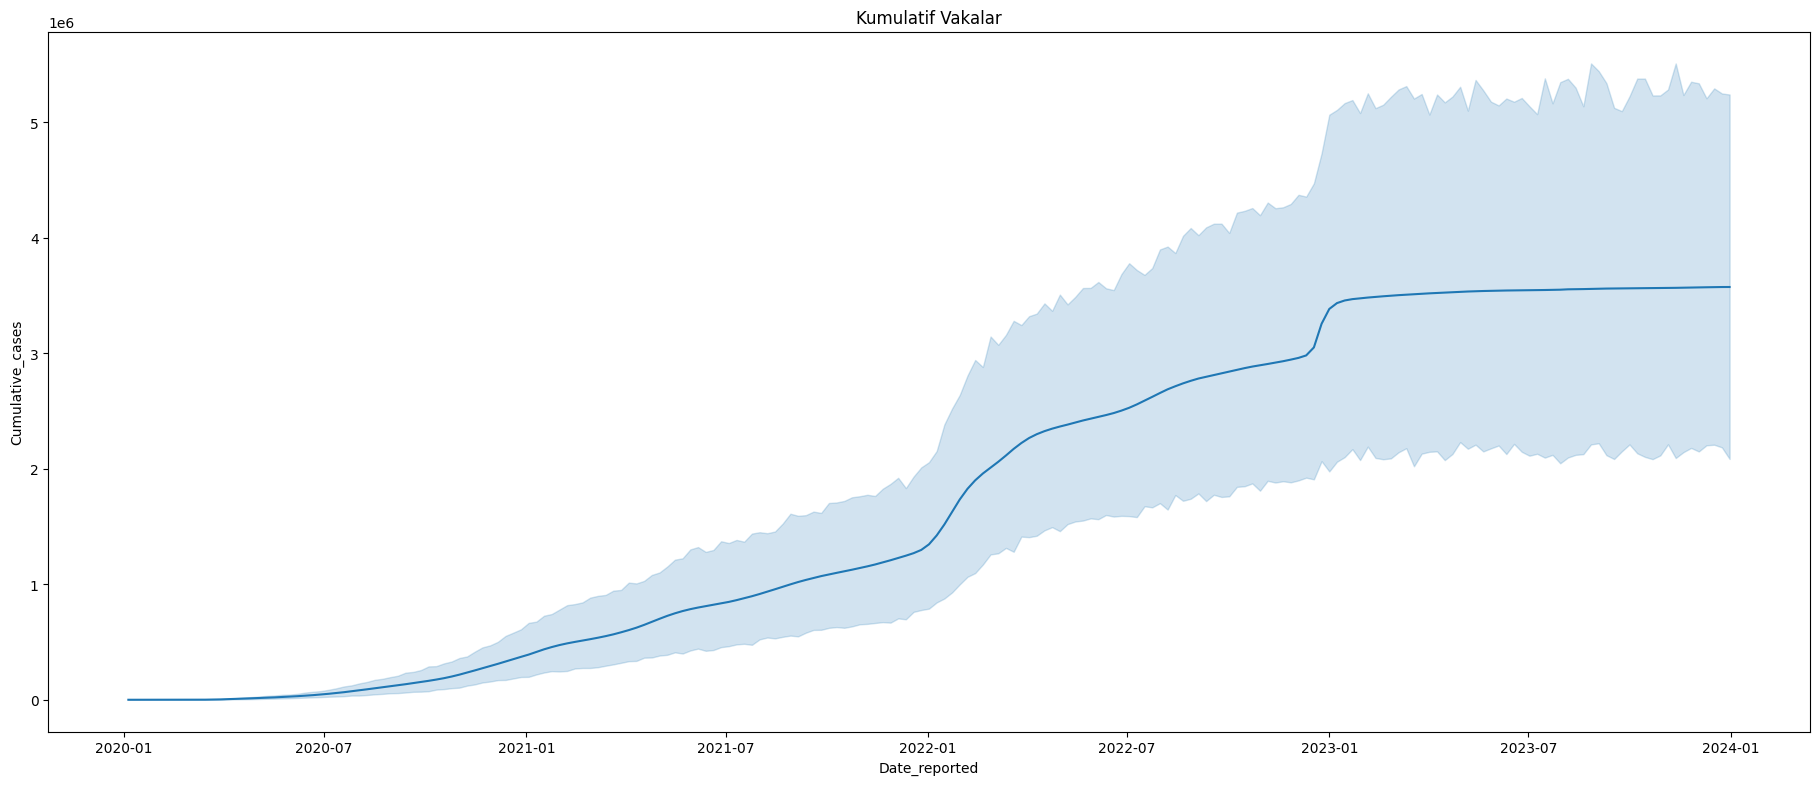

In [299]:
# Kumulatif vakaların grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 2)
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=df)
plt.title('Kumulatif Vakalar')

Text(0.5, 1.0, 'Günlük Yeni Ölümler')

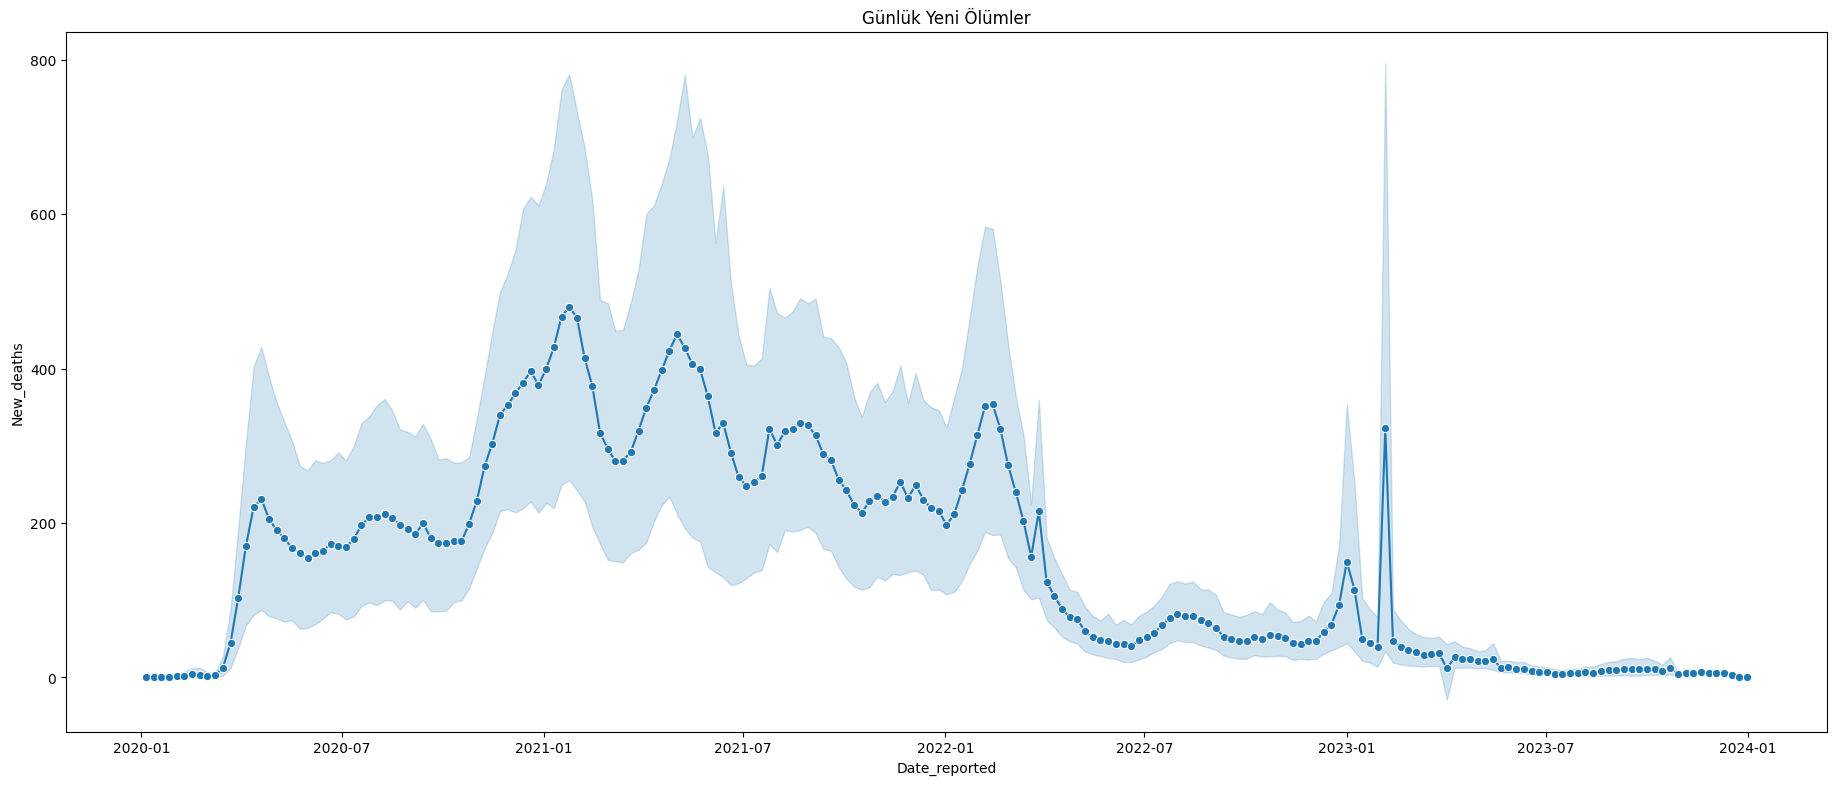

In [300]:
# Günlük yeni ölümlerin grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 3)
sns.lineplot(x='Date_reported', y='New_deaths', data=df, marker='o')
plt.title('Günlük Yeni Ölümler')

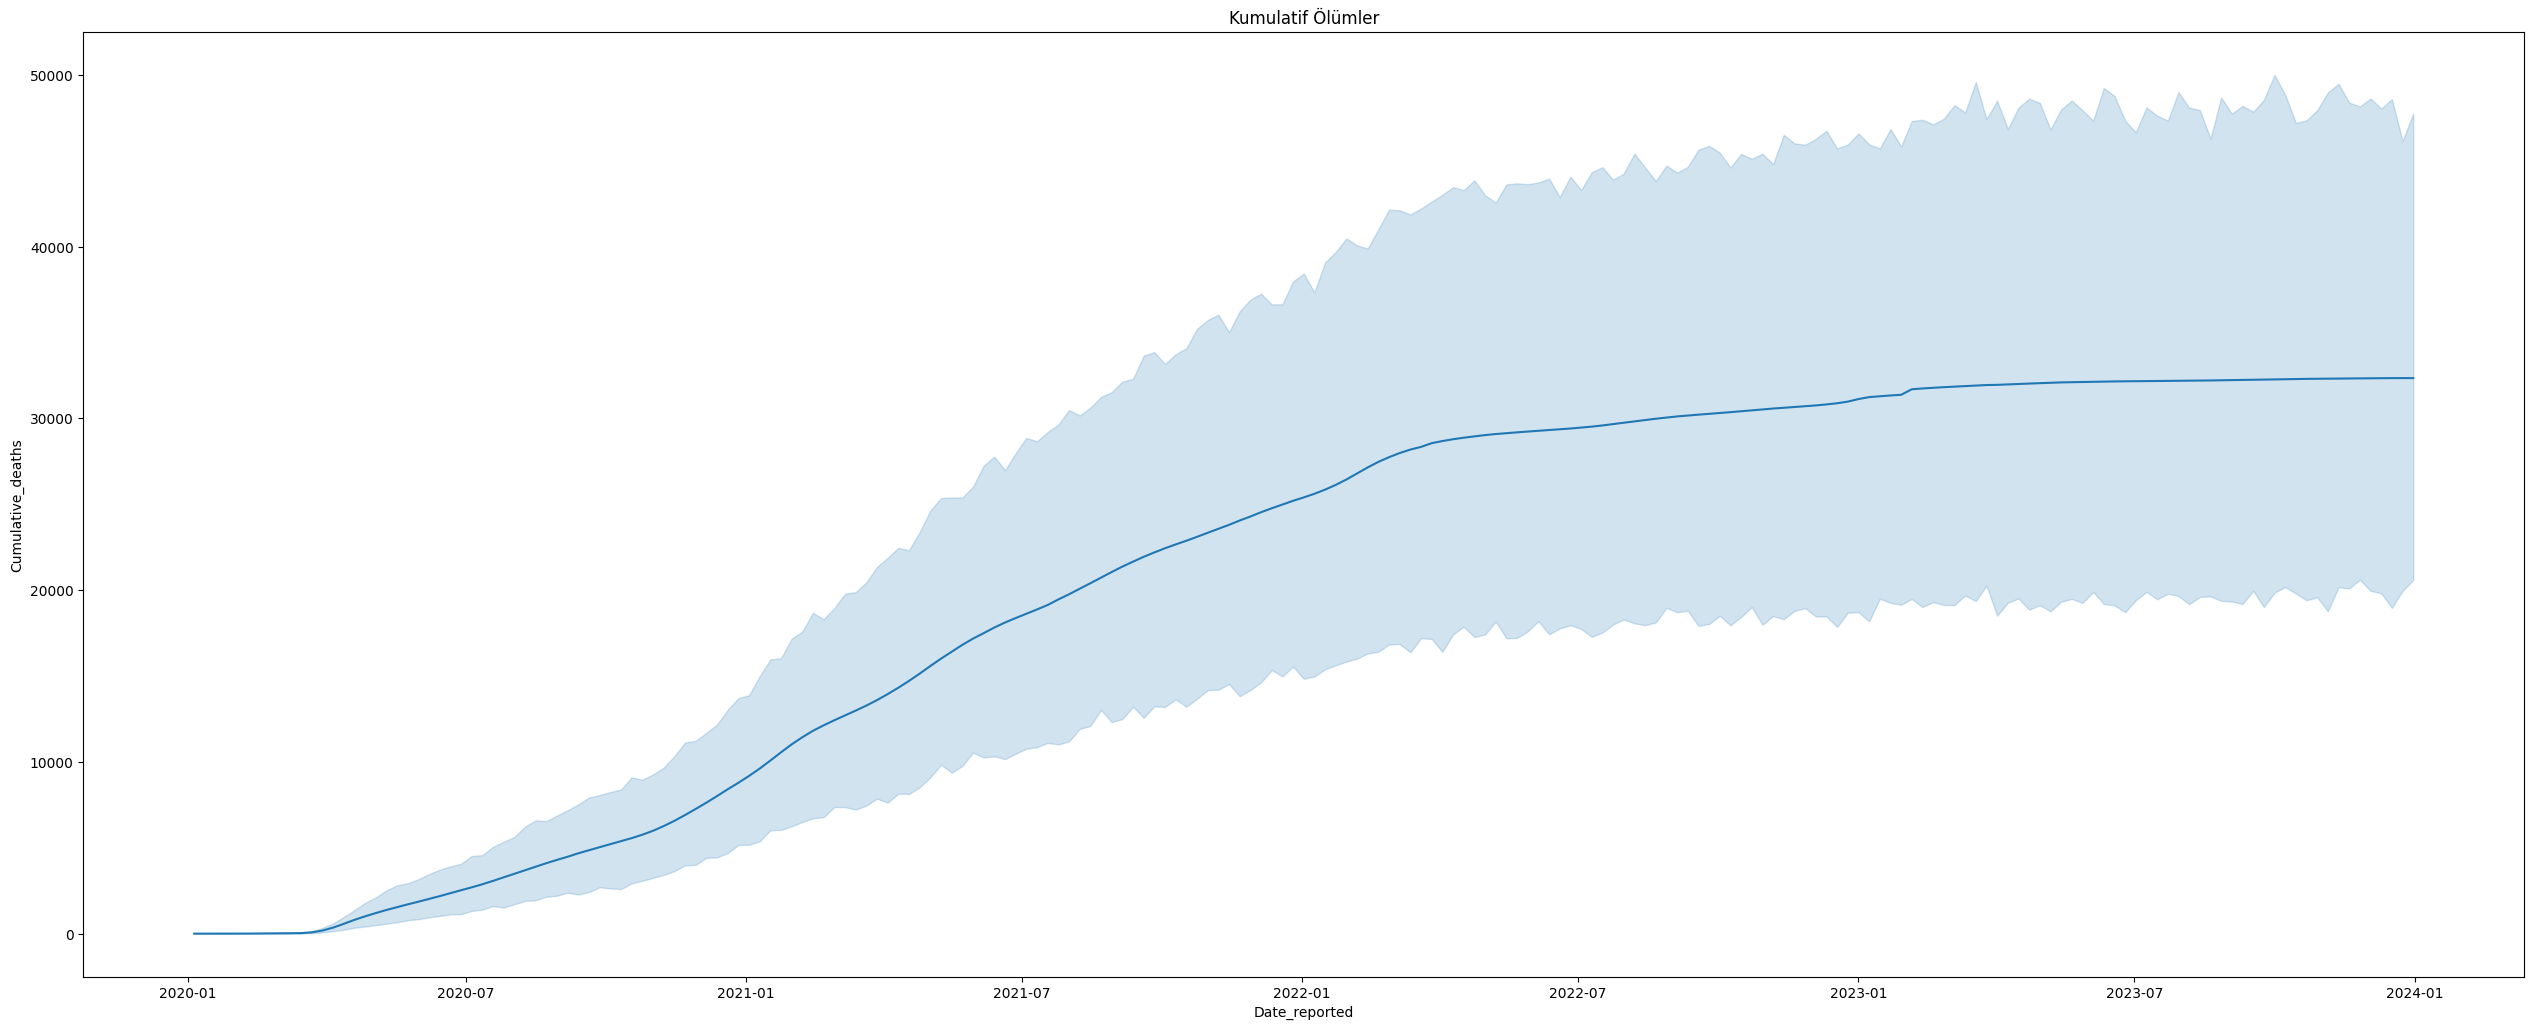

In [303]:
# Kumulatif ölümlerin grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 4)
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=df)
plt.title('Kumulatif Ölümler')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
# pip install -U scikit-learn 

In [133]:
# Gerekli sütunları seç
selected_columns = ['Date_reported', 'New_cases']
df_selected = df[selected_columns].copy()  # copy() kullanarak orijinal DataFrame'i değiştirmemenizi sağlayın

# Tarih sütununu datetime veri tipine çevir
df_selected['Date_reported'] = pd.to_datetime(df_selected['Date_reported'])

# Tarihi gün sayısına dönüştür
df_selected['Days_since_start'] = (df_selected['Date_reported'] - df_selected['Date_reported'].min()).dt.days

# Bağımsız değişken X ve bağımlı değişken y
X = df_selected['Days_since_start'].values.reshape(-1, 1)
y = df_selected['New_cases'].values

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 66256696821.49327
R-squared (R2): -6.978573720317627e-05


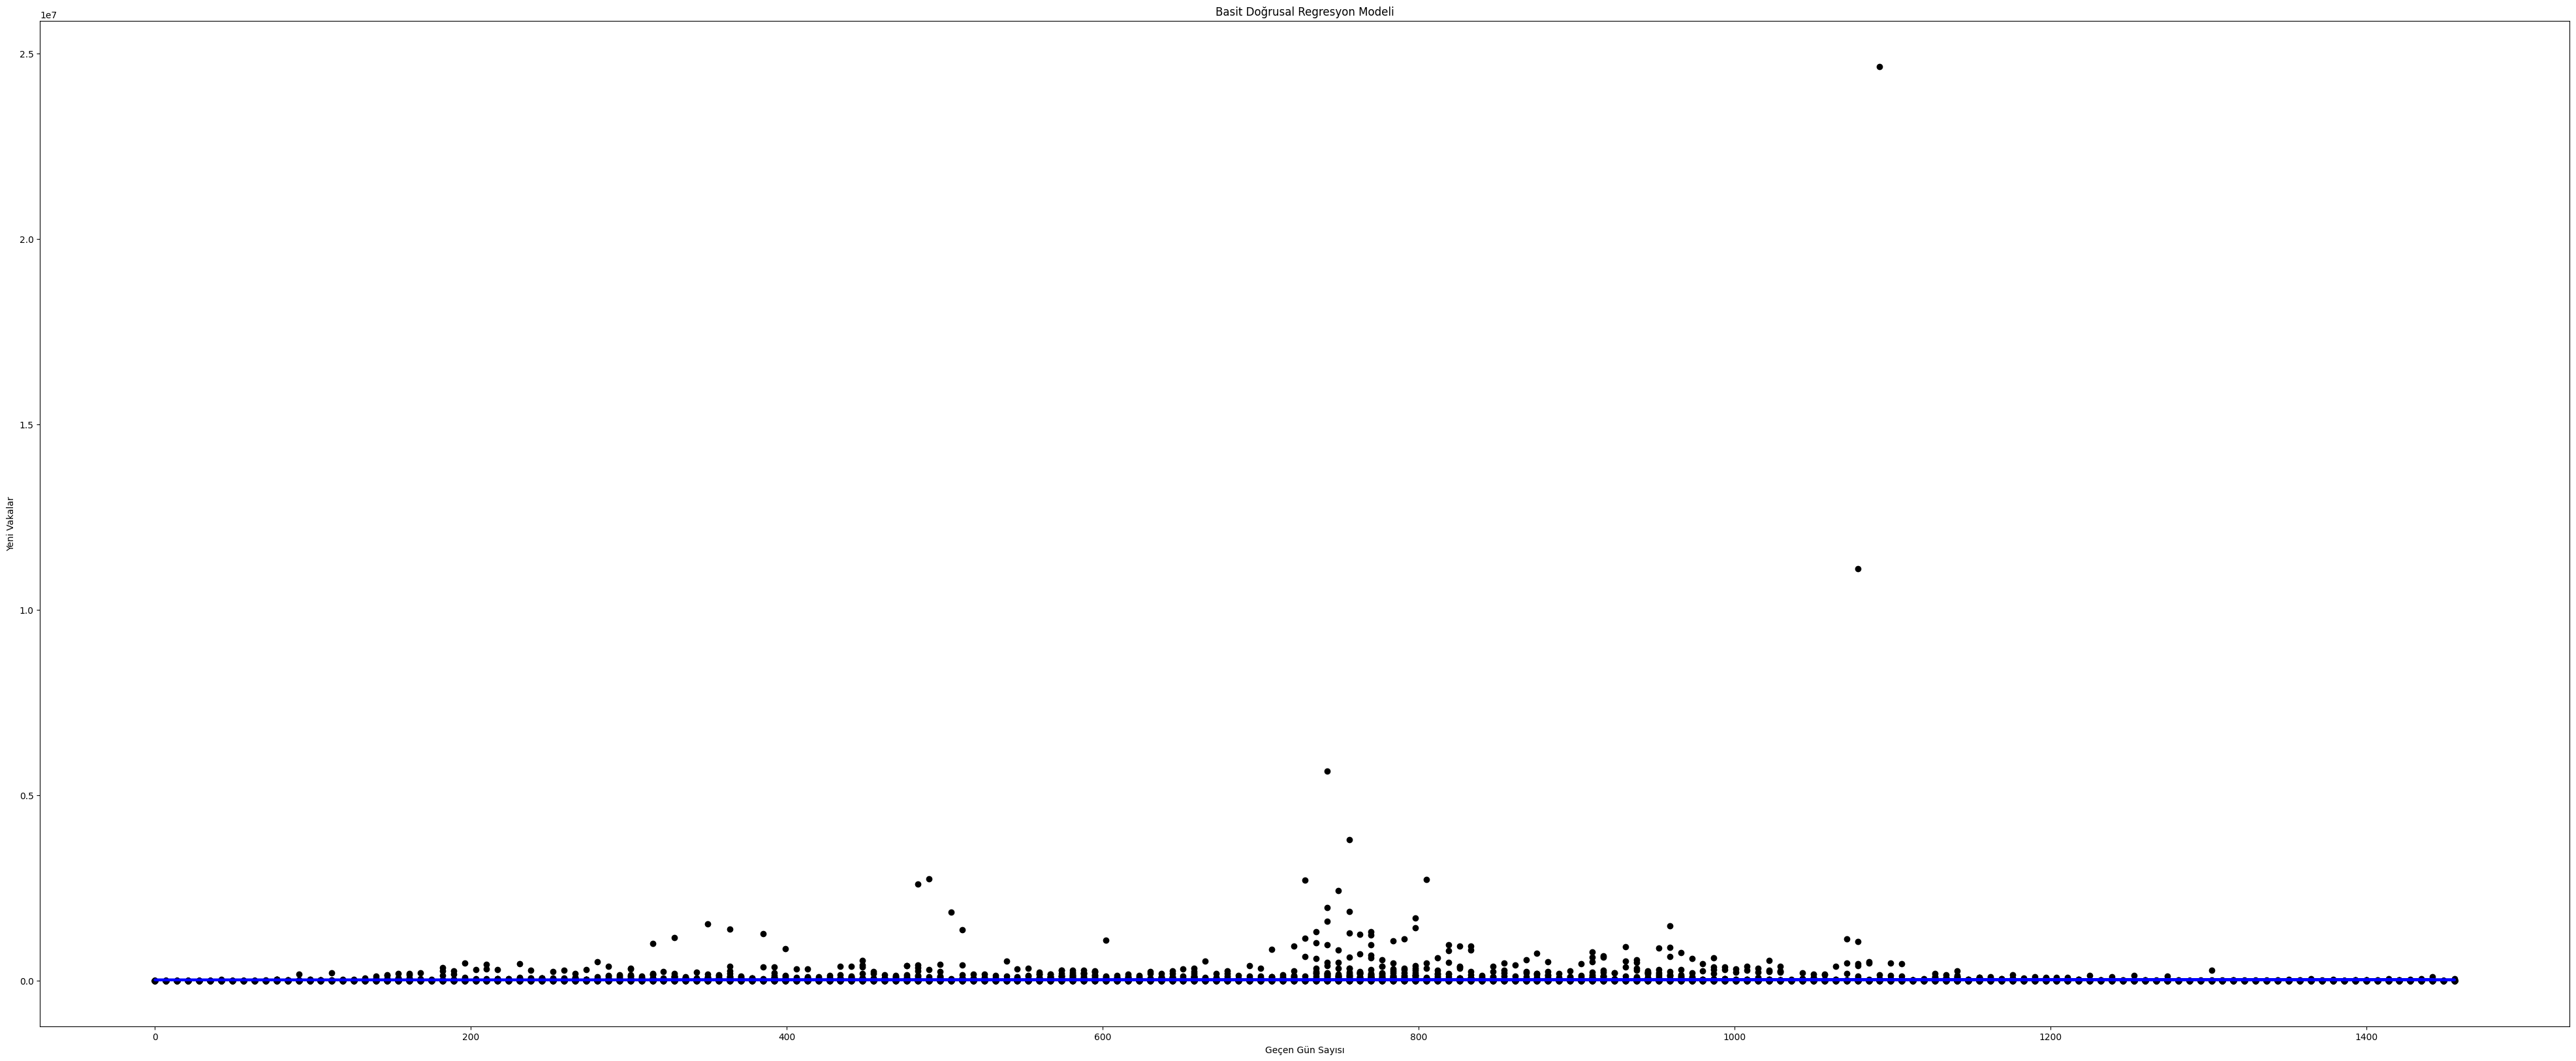

In [134]:
# Ortalama Kare Hata (Mean Squared Error - MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-kare (R-squared) değeri
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

# Modelin doğrusunu ve veriyi görselleştir
plt.figure(figsize=(50, 20))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Geçen Gün Sayısı')
plt.ylabel('Yeni Vakalar')
plt.title('Basit Doğrusal Regresyon Modeli')
plt.show()

In [164]:
# Tarih sütununu datetime veri tipine çevirin
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Örnek: Hangi ayda olduğumuzu gösteren bir özellik ekleyin
df['Month'] = df['Date_reported'].dt.month

# Örnek: Hangi gün olduğumuzu gösteren bir özellik ekleyin
df['Day'] = df['Date_reported'].dt.day

# Örnek: Hangi yıl olduğumuzu gösteren bir özellik ekleyin
df['Year'] = df['Date_reported'].dt.year

# Elde edilen yeni DataFrame'i göster
print(df[['Date_reported', 'Month', 'Day', 'Year']].head())

  Date_reported  Month  Day  Year
0    2020-01-05      1    5  2020
1    2020-01-12      1   12  2020
2    2020-01-19      1   19  2020
3    2020-01-26      1   26  2020
4    2020-02-02      2    2  2020


In [165]:
# Kategorik özellikleri sayısal formata dönüştürün
label_encoder = LabelEncoder()
df['Country_code'] = df['Country_code'].astype(str)  # Sütunu string tipine dönüştür
df['Country_code'] = label_encoder.fit_transform(df['Country_code'])

# Yeni tarih tabanlı özellikleri de bağımsız değişkenlere ekleyin
features = ['Country_code', 'New_deaths', 'Cumulative_cases', 'Cumulative_deaths', 'Month', 'Day', 'Year']
target = 'New_cases'

# Bağımsız değişkenleri X, hedef değişkeni y olarak ayırın
X = df[features]
y = df[target]

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modelini oluşturun
model = DecisionTreeRegressor()

# Modeli eğitin
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 34063026454.079815
R-squared (R2): 0.485857200831031


In [178]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
# Bağımsız değişkenleri ve hedef değişkeni seçin
features = ['Country_code', 'New_deaths', 'Cumulative_cases', 'Cumulative_deaths', 'Month', 'Day', 'Year']
target = 'New_cases'

# Bağımsız değişkenleri X, hedef değişkeni y olarak ayırın
X = df[features]
y = df[target]

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor modelini oluşturun
model = RandomForestRegressor()

# Modeli eğitin
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 37094427248.99312
R-squared (R2): 0.44010163967439486


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Gerekli sütunları seç
selected_columns = ['Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_selected = df[selected_columns].copy()  # copy() kullanarak orijinal DataFrame'i değiştirmemenizi sağlayın

# Kategorik özellikleri sayısal formata dönüştürün
label_encoder = LabelEncoder()
df_selected['Country'] = label_encoder.fit_transform(df_selected['Country'])
df_selected['WHO_region'] = label_encoder.fit_transform(df_selected['WHO_region'])

# Bağımsız değişken X ve hedef değişken y
X = df_selected.drop('WHO_region', axis=1)
y = df_selected['WHO_region']

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluştur
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = knn_model.predict(X_test)

# Model performansını değerlendir
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.7144122858830478

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73      2942
           1       0.69      0.70      0.69      2984
           2       0.71      0.62      0.67      1375
           3       0.71      0.69      0.70      3460
           4       0.83      0.60      0.70       648
           5       0.85      0.73      0.78      2135

    accuracy                           0.71     13544
   macro avg       0.74      0.69      0.71     13544
weighted avg       0.72      0.71      0.71     13544

